# Cluster Low Dimensionality LP coeffs 

In [1]:
from psf_constants import LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
def plot_kneighbours(data, neighbours):
    nbrs = NearestNeighbors(n_neighbors=neighbours).fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Step 2: Sort and plot the distances
    distances = np.sort(distances[:, -1])
    plt.plot(distances)
    plt.ylabel(f"{neighbours}-NN Distance ")
    plt.xlabel("Points sorted by distance to nearest neighbours")
    plt.title(f"{neighbours}-NN Distance Graph")
    plt.show()

def get_number_of_clusters(data, epsilon, neighbours):
    dbscan = DBSCAN(eps=epsilon, min_samples=neighbours)
    labels = dbscan.fit_predict(data)
    #hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=neighbours)
    #labels = hdbscan_clusterer.fit_predict(data)
    print("Number of clusters:", np.max(labels)+1)
    mask = labels != -1
    points_that_are_not_noise = np.sum(mask)
    print(labels)
    print("Numbers that are not noise:", points_that_are_not_noise)
    
    return labels

def plot_cluster_labels_count(labels):

    non_noise_labels = labels[labels != -1]
    counter = Counter(non_noise_labels)
    most_common = counter.most_common()[0]
    least_common = counter.most_common()[:-2:-1][0]
    print(f"The most repeated label is {most_common[0]} with {most_common[1]} occurrences.")
    print(f"The least repeated label is {least_common[0]} with {least_common[1]} occurrence.")

    keys = list(counter.keys())
    counts = list(counter.values())

    print("Cluster density mean:", np.mean(counts))
    print("Cluster density variance:", np.std(counts))
    plt.bar(keys, counts)
    plt.xlabel('Label id')
    plt.ylabel('Frequency')
    plt.title('Label frequency in the clustering')
    plt.show()

def plot_psf_projection(psf_data, nmodes, dataset):
    #fig = plt.figure(figsize=(18,8))
    fig = plt.figure()
    x = psf_data[:, 0]
    y = psf_data[:, 1]
    z = psf_data[:, 2]
    
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    ax.set_title(f'{nmodes} Zernike modes {dataset} UMAP')
    
    #ax2 = fig.add_subplot(122, projection='3d')
    #ax2.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    #ax2.set_xlabel('X Label')
    #ax2.set_ylabel('Y Label')
    #ax2.set_zlabel('Z Label')
    #ax2.set_title('PSF UMAP')
    #ax2.view_init(elev=30, azim=120) 
    
    # Show the plot
    plt.show()
    
    fig.savefig(f"pid-{nmodes}m{dataset.replace(' ', '').lower()}umap")

### Analysis

In [93]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH)

#### 2 modes

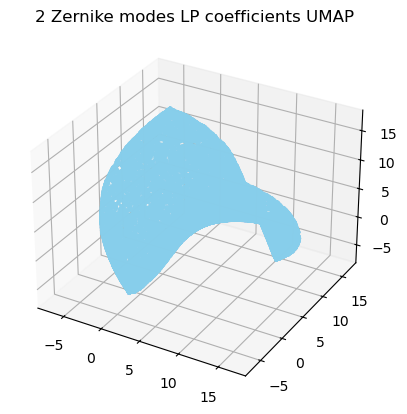

In [94]:
plot_psf_projection(zernike_2_data, 2, "LP coefficients")

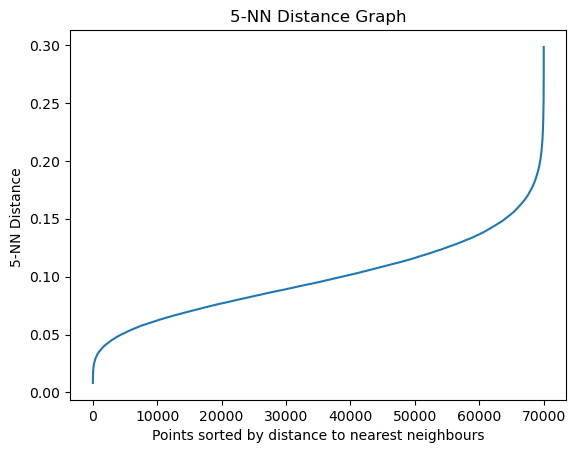

Number of clusters: 1515
[  0   1   2 ... 201 689 305]
Numbers that are not noise: 63470


In [124]:
n_neighbours = 5
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.12
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 7 with 2342 occurrences.
The least repeated label is 1481 with 1 occurrence.
Cluster density mean: 41.8943894389439
Cluster density variance: 125.13830000018957


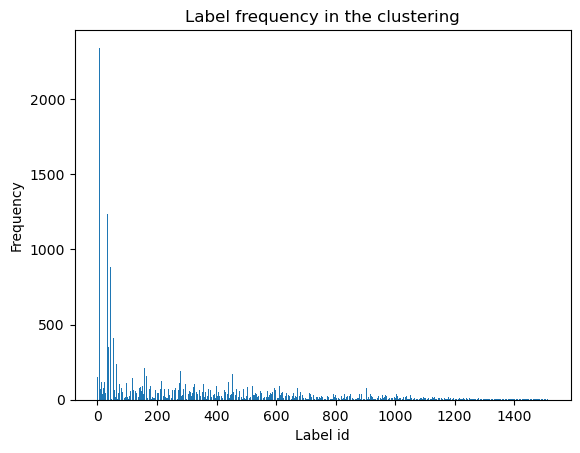

In [125]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

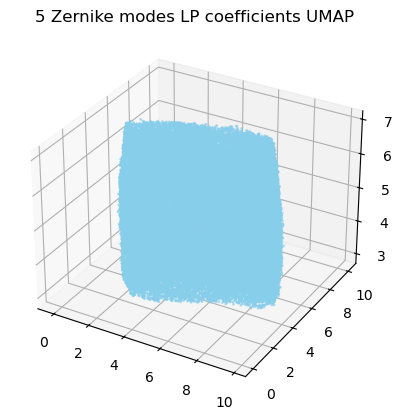

In [126]:
plot_psf_projection(zernike_5_data, 5, "LP coefficients")

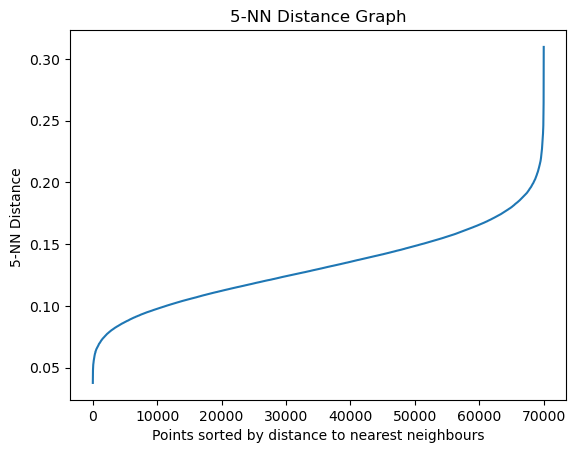

Number of clusters: 1528
[  0   1  -1 ...   0  -1 611]
Numbers that are not noise: 53995


In [127]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.133
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 35494 occurrences.
The least repeated label is 1426 with 1 occurrence.
Cluster density mean: 35.337041884816756
Cluster density variance: 907.7020405326086


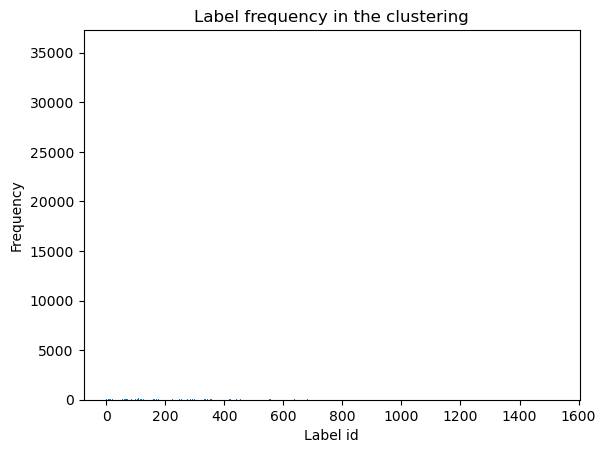

In [128]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

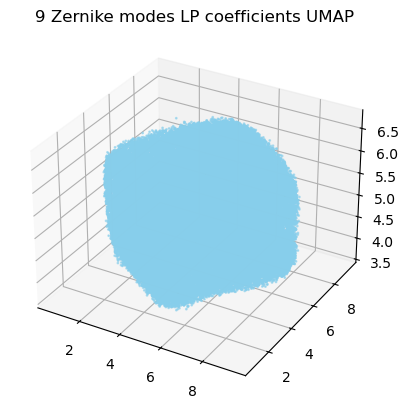

In [129]:
plot_psf_projection(zernike_9_data, 9, "LP coefficients")

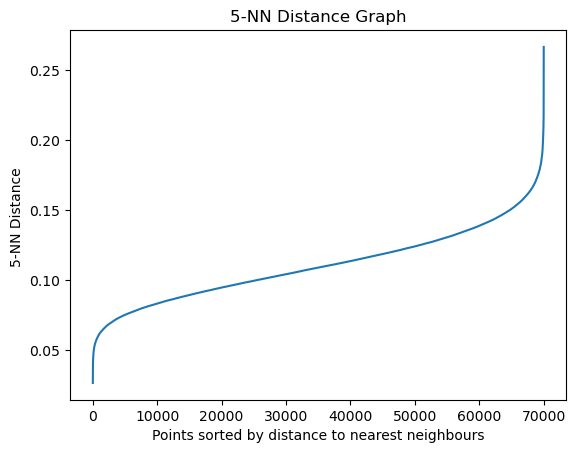

Number of clusters: 1554
[0 0 0 ... 0 0 0]
Numbers that are not noise: 52645


In [130]:
n_neighbours = 5
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.11
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 35471 occurrences.
The least repeated label is 1434 with 2 occurrence.
Cluster density mean: 33.877091377091375
Cluster density variance: 899.5473298634065


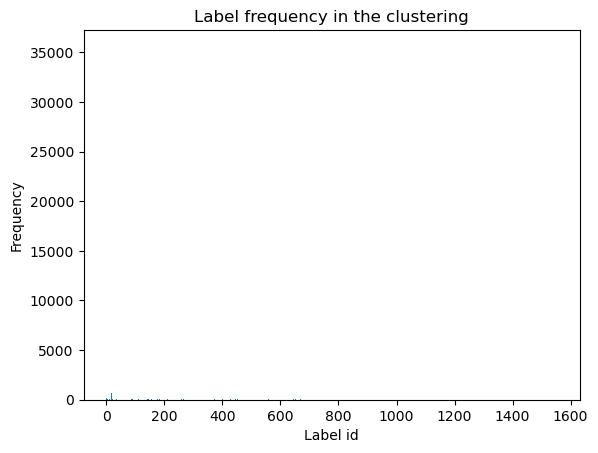

In [131]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

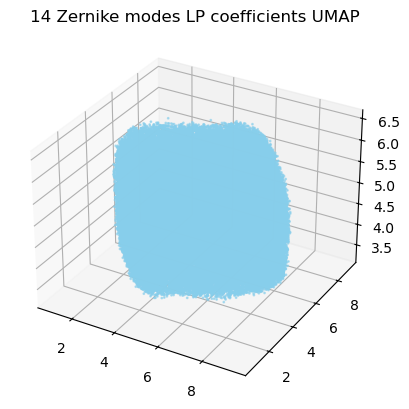

In [132]:
plot_psf_projection(zernike_14_data, 14, "LP coefficients")

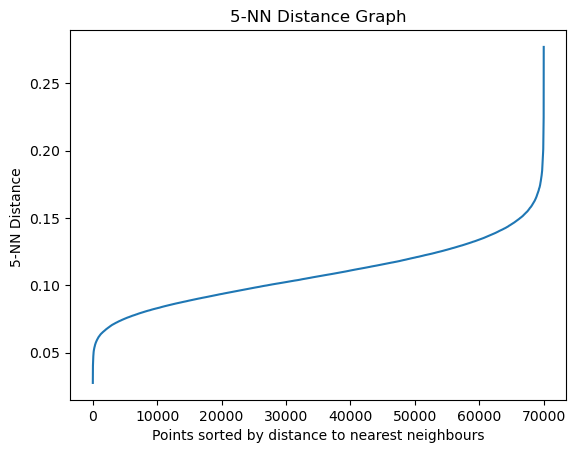

Number of clusters: 1492
[ -1 166  -1 ... 850  -1   0]
Numbers that are not noise: 56076


In [133]:
n_neighbours = 5
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.11
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 0 with 36204 occurrences.
The least repeated label is 499 with 1 occurrence.
Cluster density mean: 37.584450402144775
Cluster density variance: 937.1080093310012


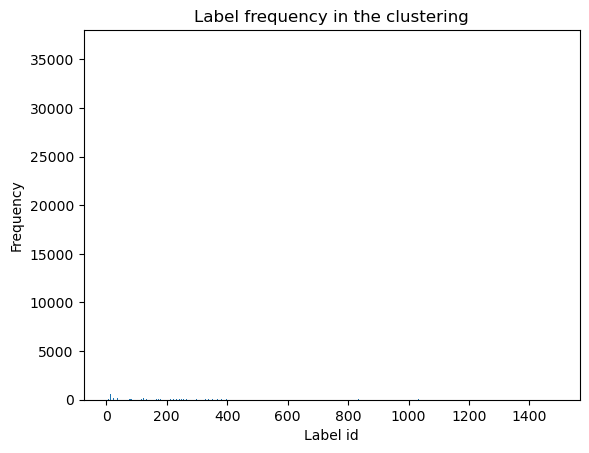

In [134]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

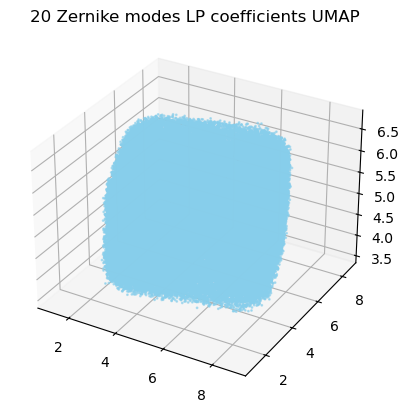

In [135]:
plot_psf_projection(zernike_20_data, 20, "LP coefficients")

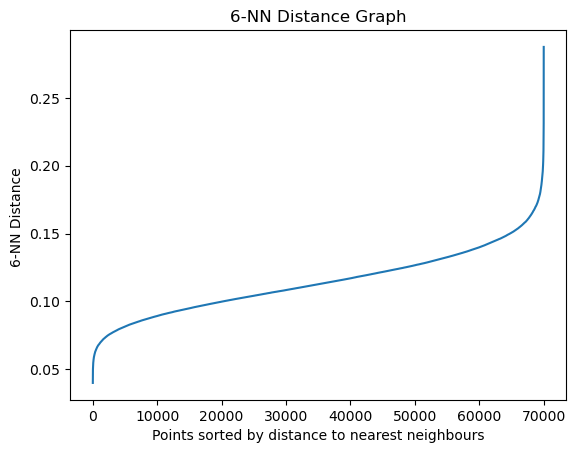

Number of clusters: 1364
[-1  0 -1 ... -1  0 -1]
Numbers that are not noise: 50189


In [148]:
n_neighbours=6
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.109
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 0 with 32179 occurrences.
The least repeated label is 1355 with 1 occurrence.
Cluster density mean: 36.79545454545455
Cluster density variance: 870.9277908981954


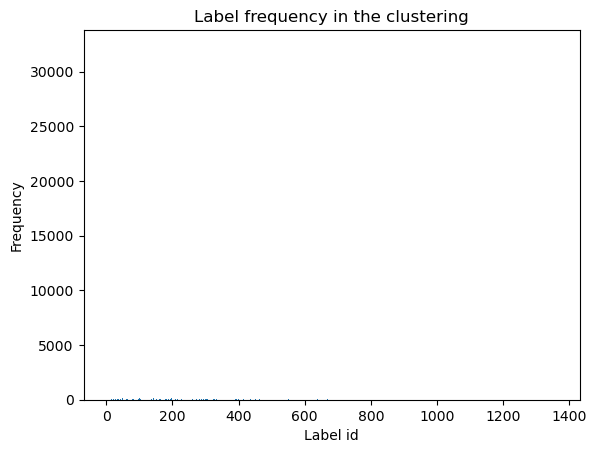

In [149]:
plot_cluster_labels_count(labels_20m)

### Save clusters

In [150]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Output Fluxes

In [151]:
from psf_constants import LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH

from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [152]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)

### Analysis

#### 2 modes

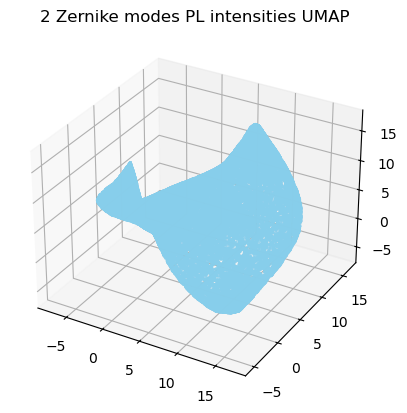

In [162]:
plot_psf_projection(zernike_2_data, 2, "PL intensities")

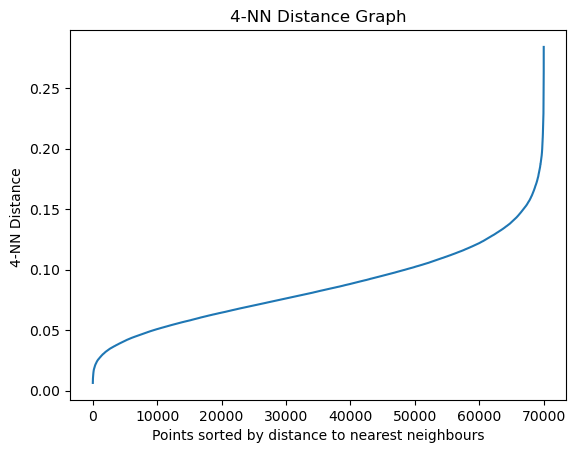

Number of clusters: 1547
[  0   1   2 ... 192 660 310]
Numbers that are not noise: 65046


In [163]:
n_neighbours = 4
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.116
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 4 with 3486 occurrences.
The least repeated label is 1531 with 2 occurrence.
Cluster density mean: 42.04654169360052
Cluster density variance: 150.99203232658937


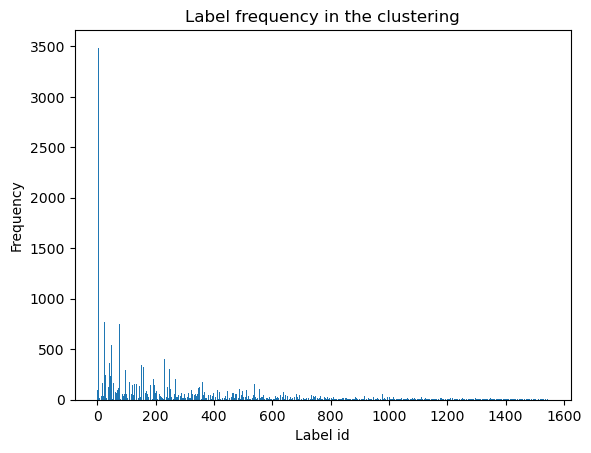

In [164]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

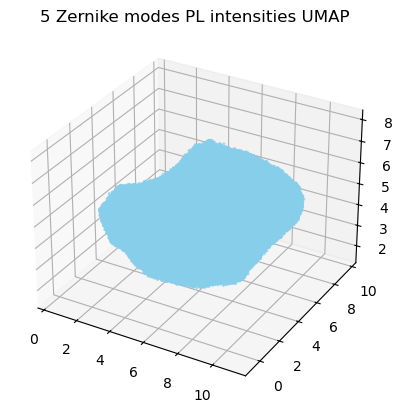

In [165]:
plot_psf_projection(zernike_5_data, 5, "PL intensities")

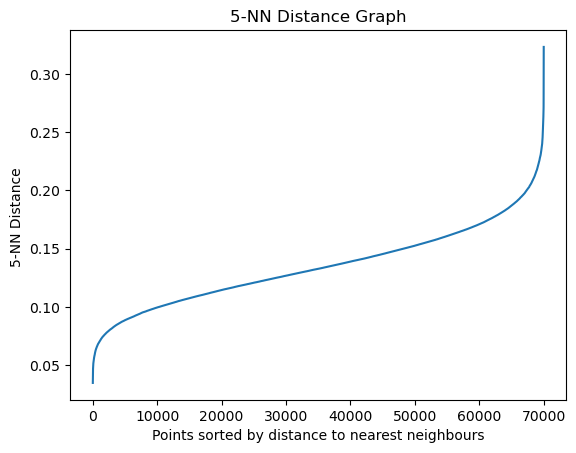

Number of clusters: 1621
[  0  -1  -1 ...   2  -1 469]
Numbers that are not noise: 51391


In [175]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.133
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 8 with 8813 occurrences.
The least repeated label is 1529 with 2 occurrence.
Cluster density mean: 31.703269586674892
Cluster density variance: 362.2808582843624


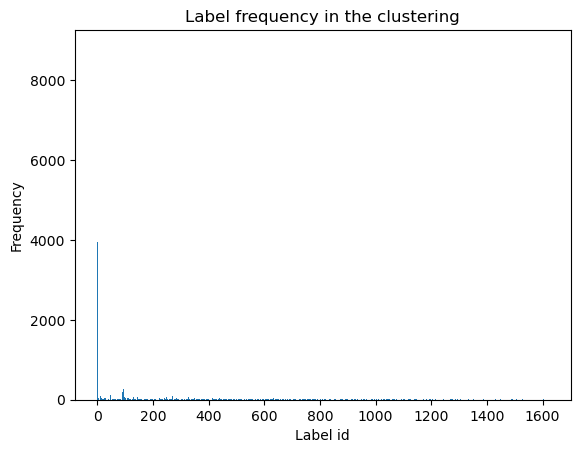

In [176]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

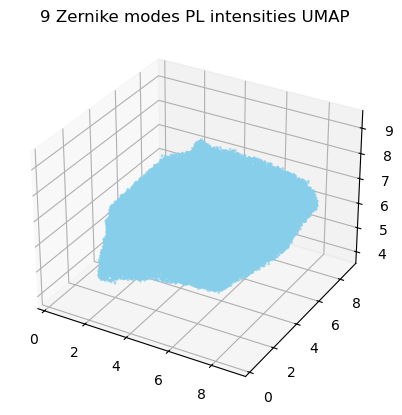

In [177]:
plot_psf_projection(zernike_9_data, 9, "PL intensities")

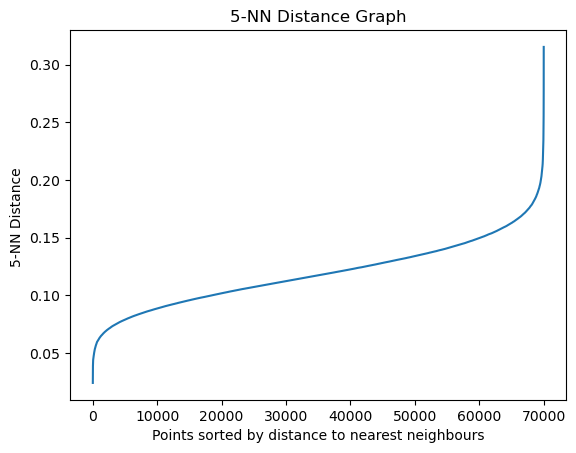

Number of clusters: 1569
[ 0 92  0 ...  0  0 -1]
Numbers that are not noise: 53847


In [204]:
n_neighbours = 5
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.12
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 33086 occurrences.
The least repeated label is 1484 with 1 occurrence.
Cluster density mean: 34.31931166347992
Cluster density variance: 839.9651571823334


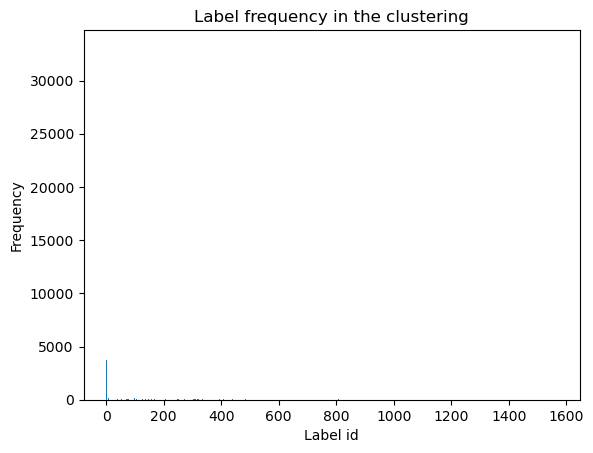

In [205]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

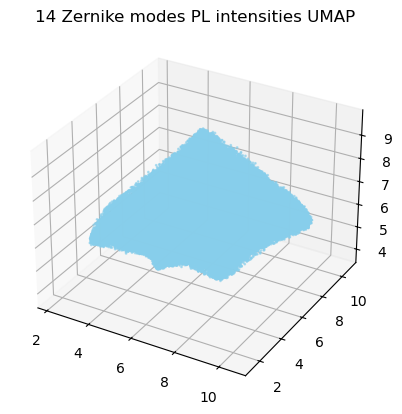

In [206]:
plot_psf_projection(zernike_14_data, 14, "PL intensities")

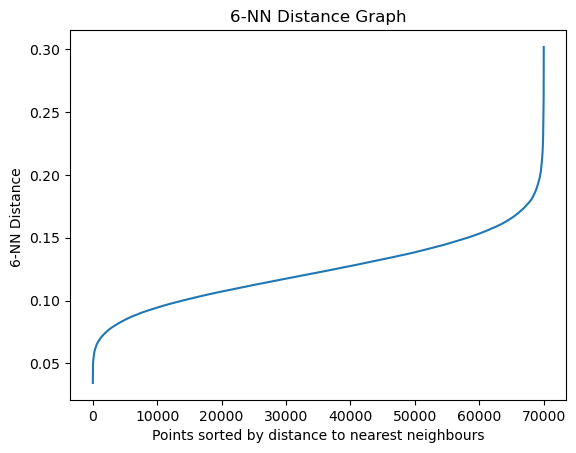

Number of clusters: 1587
[  -1   -1  431 ...    2 1036    2]
Numbers that are not noise: 41081


In [208]:
n_neighbours = 6
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.111
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 2 with 10131 occurrences.
The least repeated label is 1565 with 2 occurrence.
Cluster density mean: 25.885948330182735
Cluster density variance: 282.3925822026491


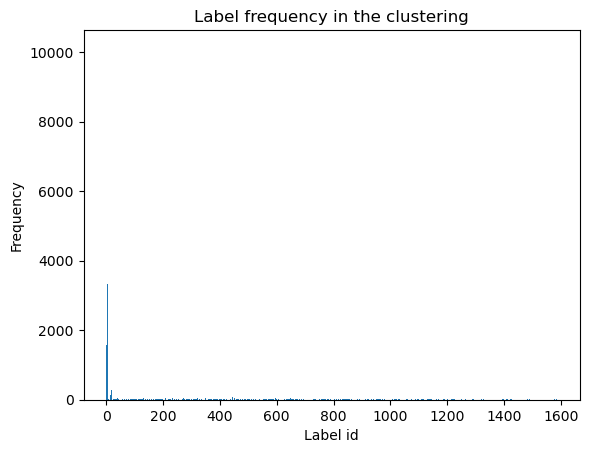

In [209]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

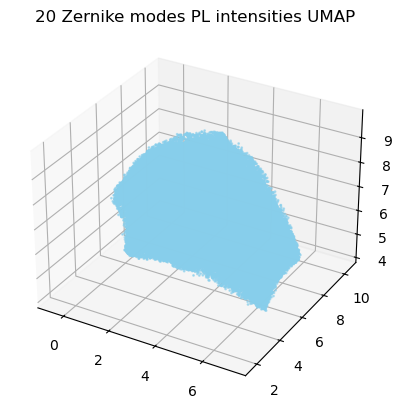

In [211]:
plot_psf_projection(zernike_20_data, 20, "PL intensities")

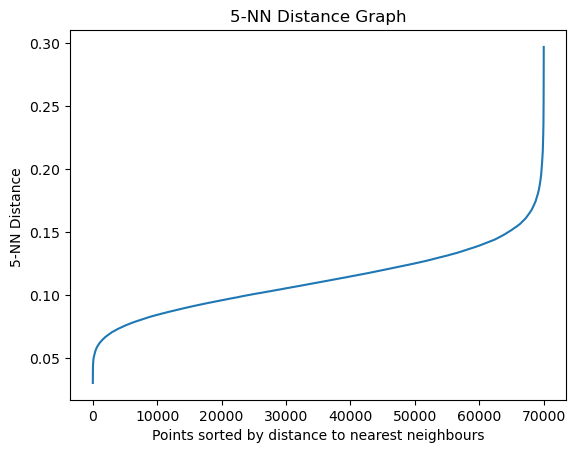

Number of clusters: 1524
[  0 220 318 ...   1 211  -1]
Numbers that are not noise: 54563


In [232]:
n_neighbours = 5
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.113
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 1 with 37724 occurrences.
The least repeated label is 1322 with 1 occurrence.
Cluster density mean: 35.80249343832021
Cluster density variance: 965.8478608229403


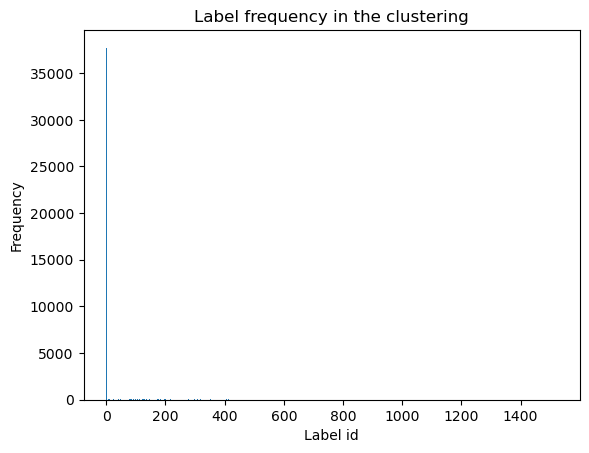

In [233]:
plot_cluster_labels_count(labels_20m)

In [234]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_20m)

# Cluster Low Dimensionality PSF

In [3]:
from psf_constants import LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [4]:
zernike_2_data = np.load(LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

In [248]:
n_neighbours = 5
epsilon = 0.157

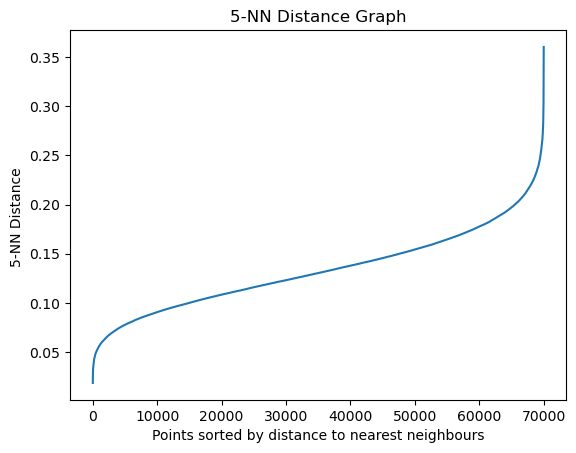

In [245]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [249]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

Number of clusters: 1466
[  0   1   2 ... 191 626 288]
Numbers that are not noise: 63877


The most repeated label is 38 with 2950 occurrences.
The least repeated label is 1444 with 1 occurrence.
Cluster density mean: 43.57230559345157
Cluster density variance: 138.00416891602956


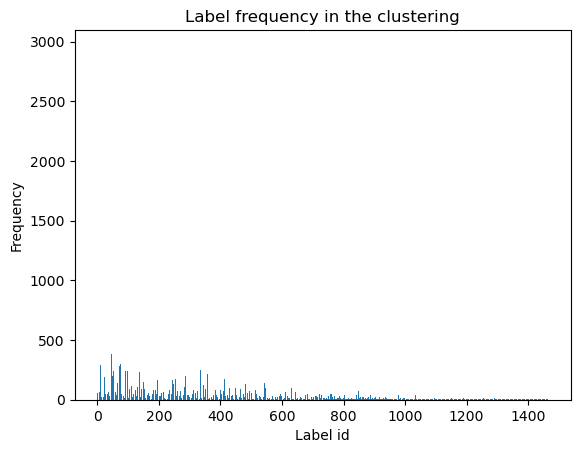

In [251]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [15]:
n_neighbours = 4
epsilon = 0.31

In [16]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

Number of clusters: 1557
[ 0 -1 -1 ...  0 -1  0]
Numbers that are not noise: 46175


The most repeated label is 0 with 34114 occurrences.
The least repeated label is 1537 with 1 occurrence.
Cluster density mean: 29.656390494540783
Cluster density variance: 864.1226167069723


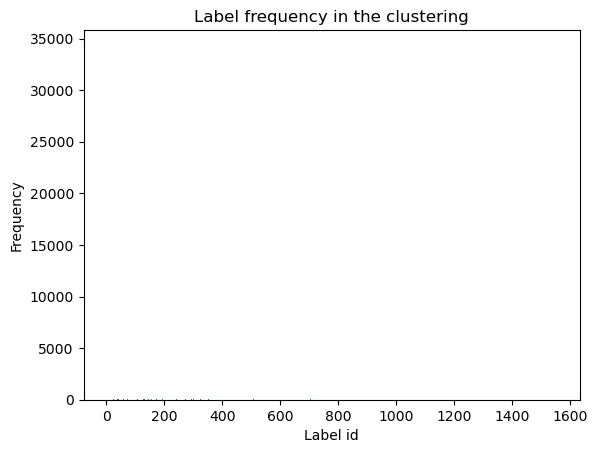

In [17]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [39]:
n_neighbours = 4
epsilon = 0.265

In [40]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

Number of clusters: 1408
[0 0 0 ... 0 0 0]
Numbers that are not noise: 46556


The most repeated label is 0 with 37015 occurrences.
The least repeated label is 1177 with 1 occurrence.
Cluster density mean: 33.06534090909091
Cluster density variance: 985.9624393505621


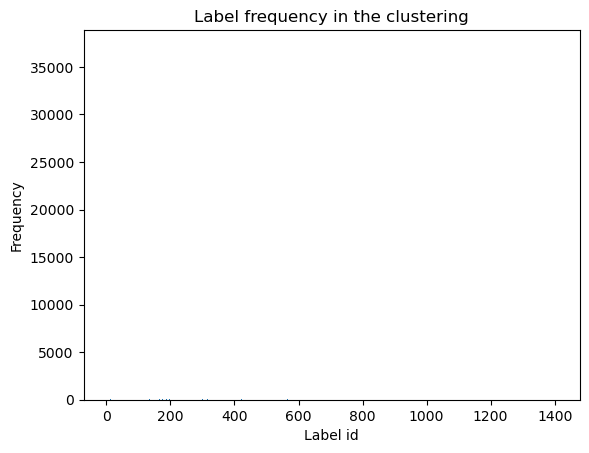

In [41]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [8]:
n_neighbours = 4
epsilon = 0.2

In [9]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

Number of clusters: 1964
[  -1   -1   -1 ...   -1   -1 1388]
Numbers that are not noise: 16986


The most repeated label is 16 with 400 occurrences.
The least repeated label is 1074 with 1 occurrence.
Cluster density mean: 8.64867617107943
Cluster density variance: 19.3104340926416


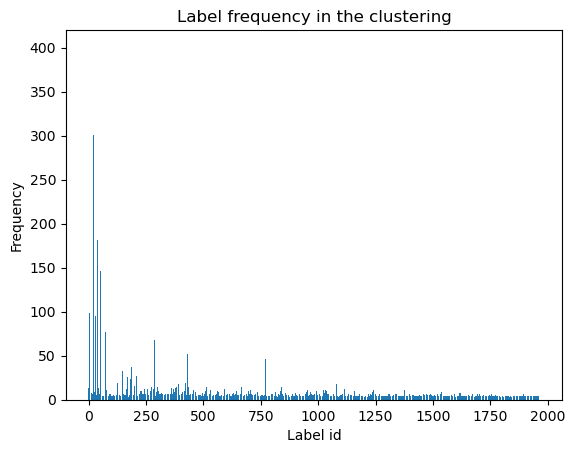

In [10]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [14]:
n_neighbours = 4
epsilon = 0.23

In [15]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

Number of clusters: 1985
[ 0 -1 -1 ... -1 -1 -1]
Numbers that are not noise: 33840


The most repeated label is 7 with 8970 occurrences.
The least repeated label is 1782 with 1 occurrence.
Cluster density mean: 17.047858942065492
Cluster density variance: 245.10375375026138


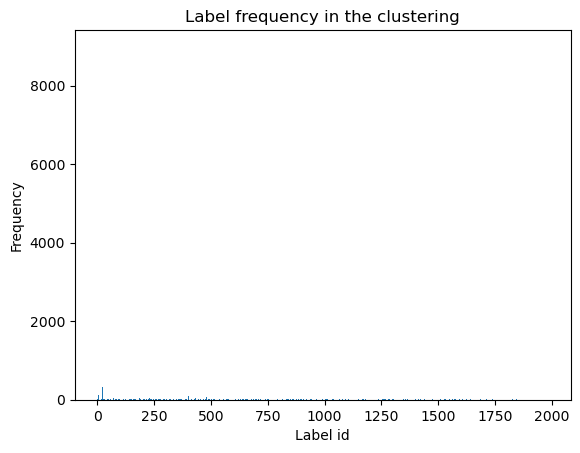

In [16]:
plot_cluster_labels_count(labels_20m)

In [283]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Predicted PSF

In [1]:
from psf_constants import LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [6]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

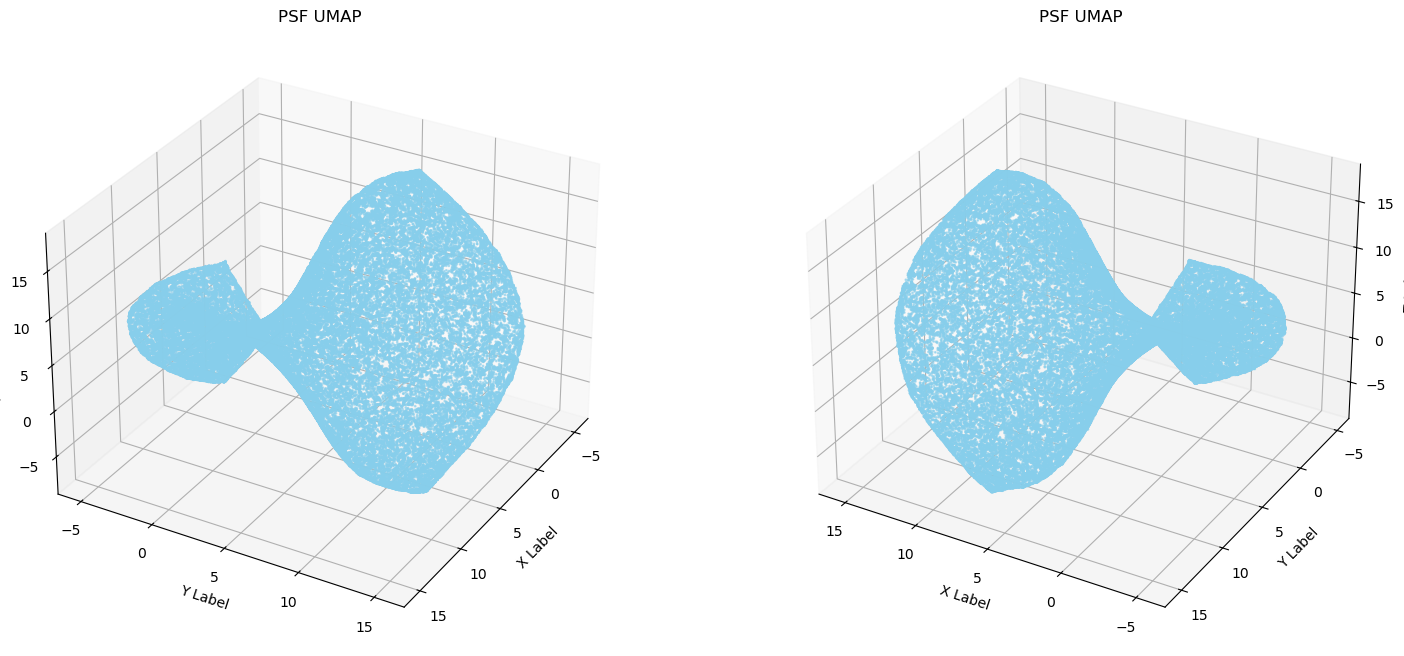

In [7]:
n_neighbours = 6
epsilon = 0.125

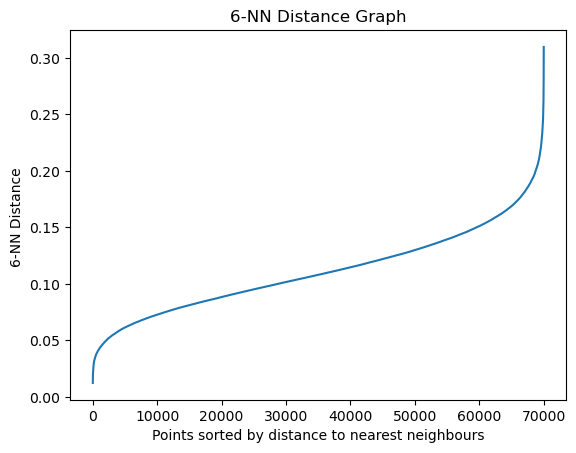

Number of clusters: 1528
[  0   1   2 ... 194 752 299]
Numbers that are not noise: 61427


In [12]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [ ]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 26 with 1501 occurrences.
The least repeated label is 1307 with 1 occurrence.
Cluster density mean: 40.200916230366495
Cluster density variance: 87.57165846124343


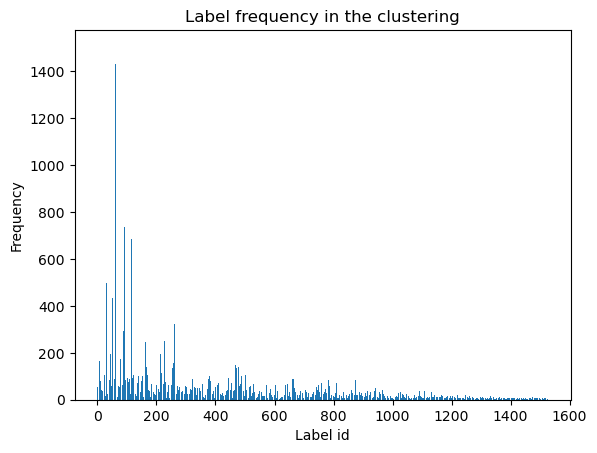

In [13]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

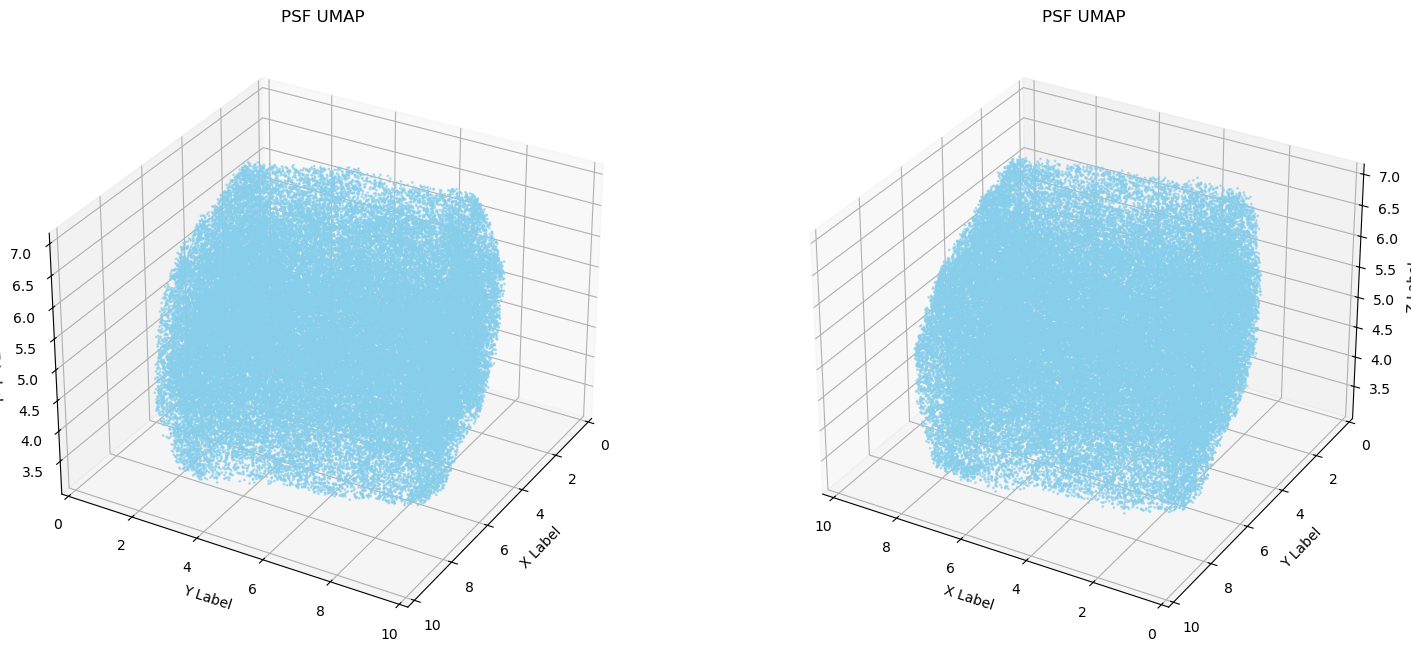

In [15]:
n_neighbours = 5
epsilon = 0.131

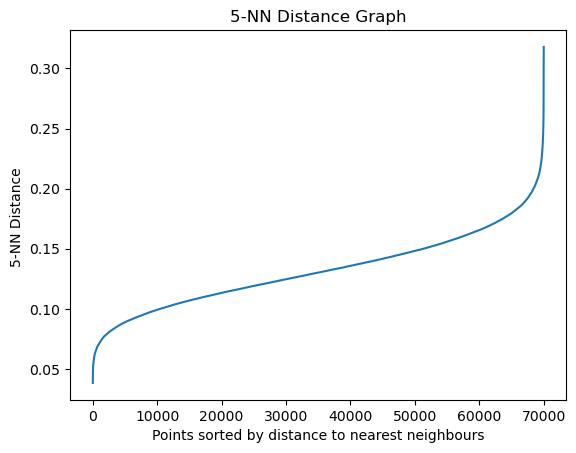

Number of clusters: 1681
[ 0 -1 -1 ...  0 37  0]
Numbers that are not noise: 52719


In [16]:
plot_kneighbours(zernike_5_data, n_neighbours)

In [ ]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 34660 occurrences.
The least repeated label is 1360 with 1 occurrence.
Cluster density mean: 31.36168947055324
Cluster density variance: 844.9982678272507


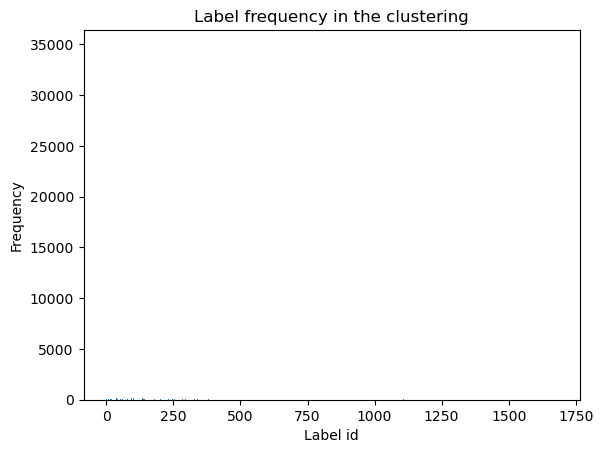

In [17]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

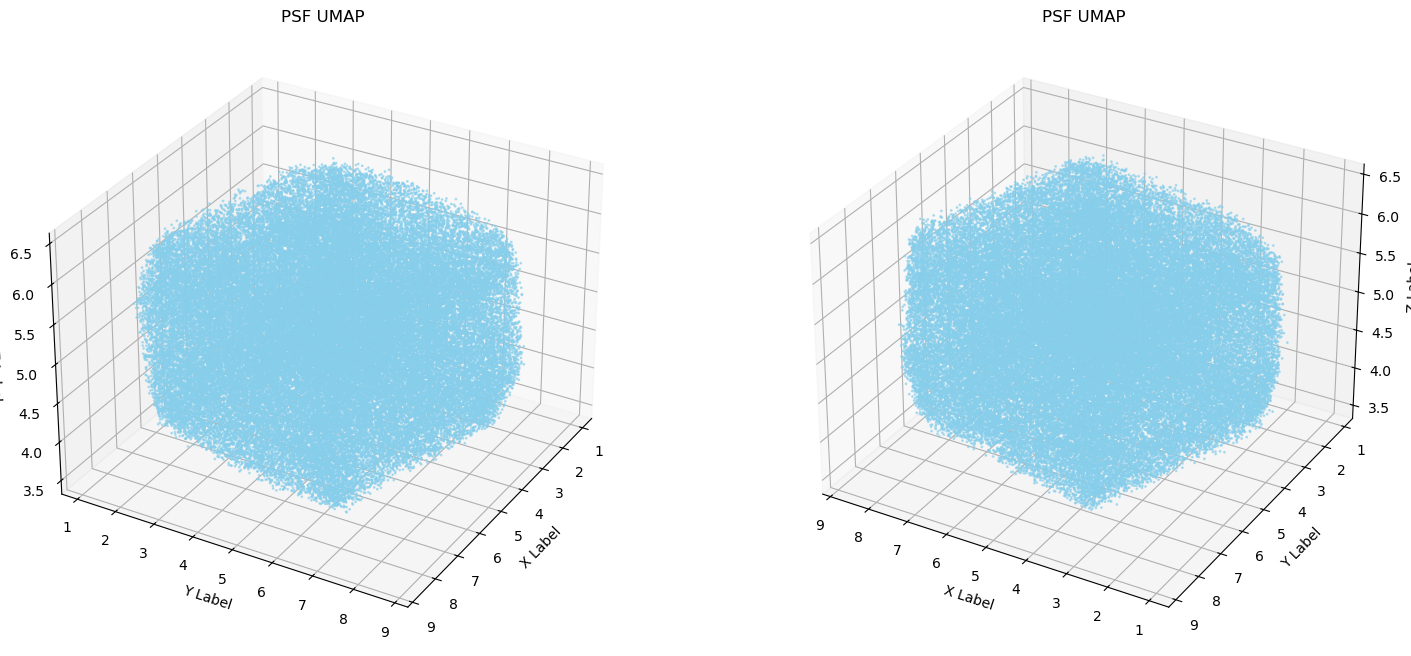

In [18]:
n_neighbours = 5
epsilon = 0.105

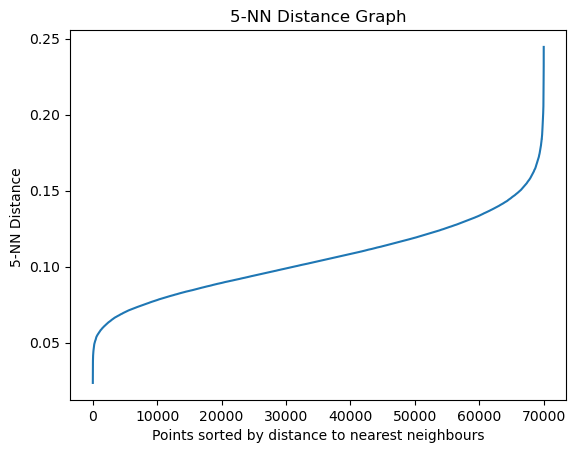

Number of clusters: 1628
[0 0 0 ... 0 0 0]
Numbers that are not noise: 52024


In [21]:
plot_kneighbours(zernike_9_data, n_neighbours)

In [ ]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 36354 occurrences.
The least repeated label is 1404 with 1 occurrence.
Cluster density mean: 31.955773955773957
Cluster density variance: 900.5339307610343


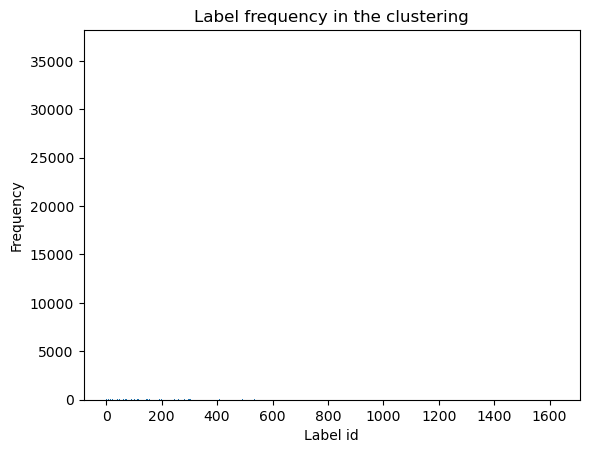

In [22]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

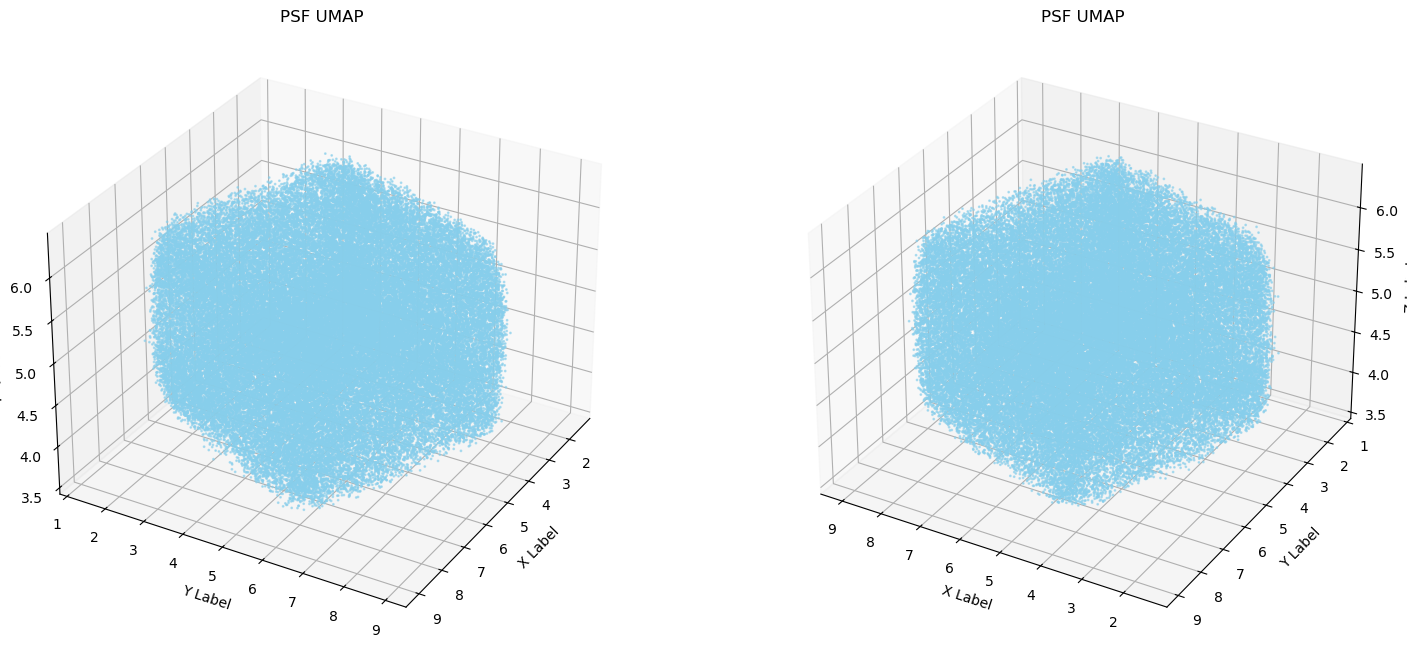

In [24]:
n_neighbours = 5
epsilon = 0.1

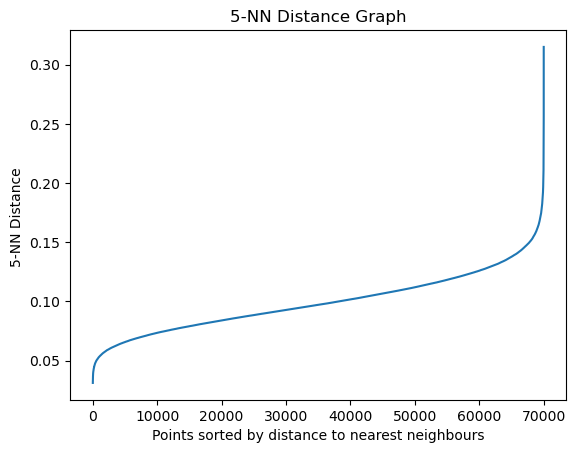

Number of clusters: 1467
[-1  0  0 ... -1 -1  0]
Numbers that are not noise: 53265


In [25]:
plot_kneighbours(zernike_14_data, n_neighbours)

In [ ]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 0 with 38845 occurrences.
The least repeated label is 1115 with 1 occurrence.
Cluster density mean: 36.30879345603272
Cluster density variance: 1013.6463020075907


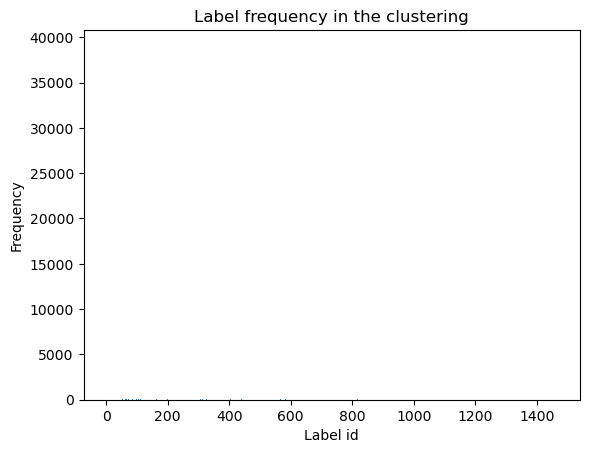

In [26]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [ ]:
n_neighbours = 5
epsilon = 0.094

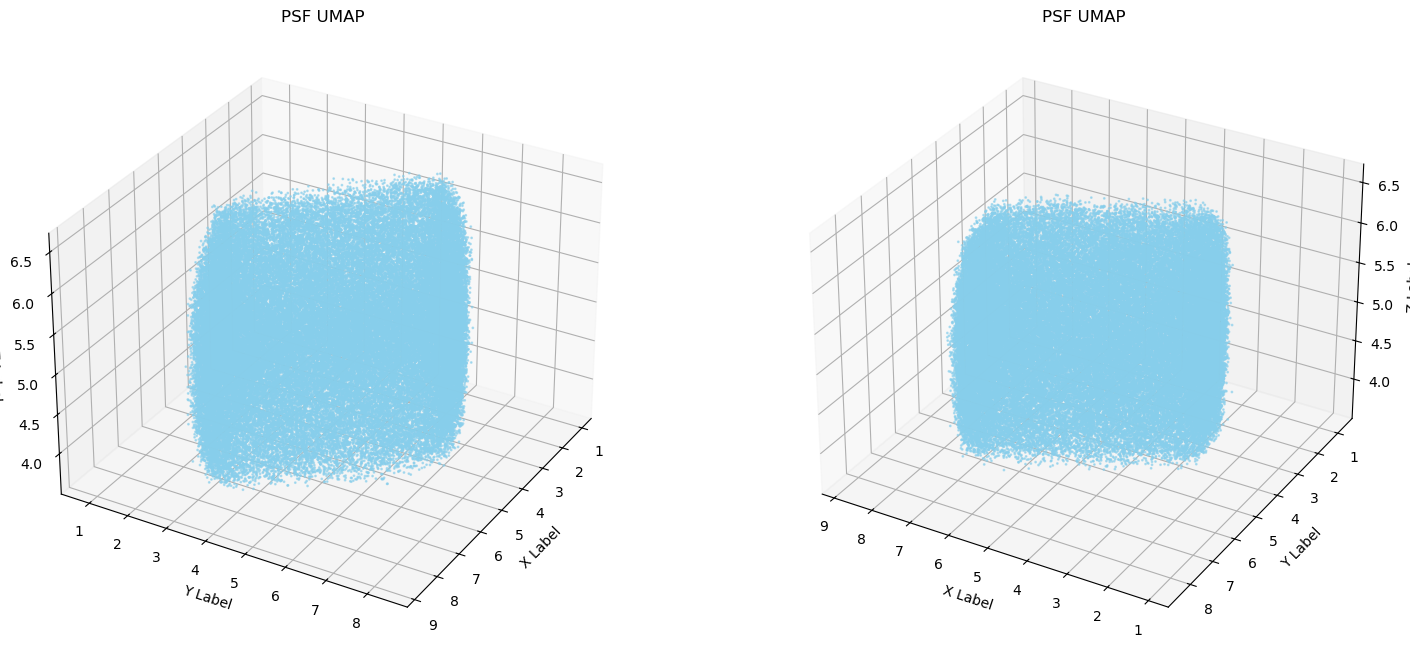

In [27]:
plot_psf_projection(zernike_20_data)

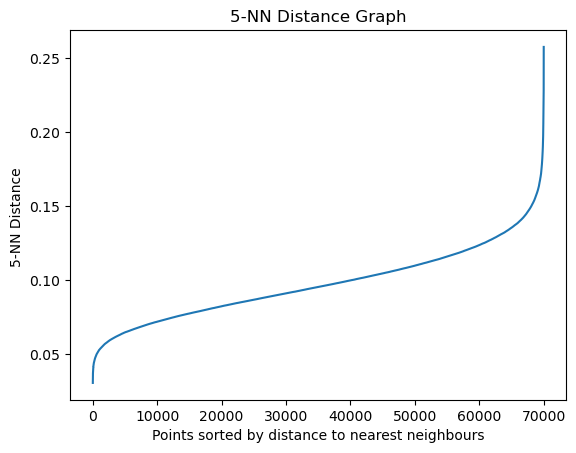

Number of clusters: 1702
[  0   2   1 ...  -1   2 965]
Numbers that are not noise: 48941


In [30]:
plot_kneighbours(zernike_20_data, n_neighbours)

In [ ]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 2 with 33451 occurrences.
The least repeated label is 1633 with 1 occurrence.
Cluster density mean: 28.754994124559342
Cluster density variance: 810.4065404296666


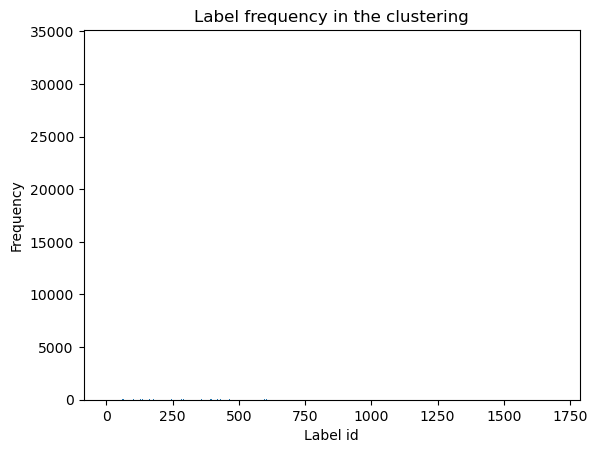

In [31]:
plot_cluster_labels_count(labels_20m)

In [32]:
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)